# What is this notebook about?

Here we learn how to load data from GIM forecasting service.



### We need models list

The forecast service operates several models and first of all we need list of model names. Use URL below (no extra parameters needed):

```
https://services.simurg.space/gim-tec-forecast/models
```

You got model name like `GIMini-NN-F10.7-180`, where: `NN` is architecture; `F10.7` is data used as input for model; `180` is forecast horizon in days. 

In [1]:
import requests

resp = requests.get("https://services.simurg.space/gim-tec-forecast/models")

if resp.status_code != 200:
    raise ValueError(f"Could not get proper response, code: {resp.status_code}")
else:
    print(f"Got models: \n{resp.content.decode()}")

Got models: 
["GIMini-NN-F10.7-1","GIMini-LSTM-F10.7-1","GIMini-XGBDT-F10.7-1","GIMini-NN-F10.7-3","GIMini-LSTM-F10.7-3","GIMini-XGBDT-F10.7-3","GIMini-NN-F10.7-7","GIMini-LSTM-F10.7-7","GIMini-XGBDT-F10.7-7","GIMini-NN-F10.7-30","GIMini-LSTM-F10.7-30","GIMini-XGBDT-F10.7-30","GIMini-NN-F10.7-60","GIMini-LSTM-F10.7-60","GIMini-XGBDT-F10.7-60","GIMini-NN-F10.7-180","GIMini-LSTM-F10.7-180","GIMini-XGBDT-F10.7-180"]


### Then use model code and get forecasts

The model forecast are available using URL (`model_code` needed from request above):

```
https://services.simurg.space/gim-tec-forecast/get_forecasts/{model_code}
```

You'll get response like:

```
{
    "id":606,
    "model_code":"GIMini-NN-F10.7-7",
    "forecast_start_date":"2025-06-18T00:00:00",
    "forecast_end_date":"2025-06-18T23:00:00"
}
```

where `id` is key to get forecast result, `model_code` that duplicates same model code as in query; `forecast_start_date` and `forecast_end_date` defines start and end time of forecast data.

In [2]:
import requests

MODEL_CODE = "GIMini-NN-F10.7-7"
URL_FORECASTS = "https://services.simurg.space/gim-tec-forecast/get_forecasts"

resp = requests.get(
    f"{URL_FORECASTS}/{MODEL_CODE}"
)

if resp.status_code != 200:
    raise ValueError(f"Could not get forecast results for model {MODEL_CODE}, code: {resp.status_code}")
else:
    print(f"Got forecast objects: \n{resp.content.decode()}")

forecasts = resp.json()    

Got forecast objects: 
[{"id":2910,"model_code":"GIMini-NN-F10.7-7","forecast_start_date":"2025-09-04T00:00:00","forecast_end_date":"2025-09-04T23:00:00"},{"id":2928,"model_code":"GIMini-NN-F10.7-7","forecast_start_date":"2025-09-05T00:00:00","forecast_end_date":"2025-09-05T23:00:00"},{"id":2946,"model_code":"GIMini-NN-F10.7-7","forecast_start_date":"2025-09-06T00:00:00","forecast_end_date":"2025-09-06T23:00:00"},{"id":2964,"model_code":"GIMini-NN-F10.7-7","forecast_start_date":"2025-09-07T00:00:00","forecast_end_date":"2025-09-07T23:00:00"},{"id":2982,"model_code":"GIMini-NN-F10.7-7","forecast_start_date":"2025-09-08T00:00:00","forecast_end_date":"2025-09-08T23:00:00"}]


### Get image if GIM forecast 

Since we get forecast `id` we can query image (as jpg) and data (as npz - numpy arrays serialized to files). First get image as it is more illustrative. Use URL (`forecast_id` and `shift_in_hours_from_midnight` needed):

```python
https://services.simurg.space/gim-tec-forecast/get_forecast_image/{forecast_id}?shift={shift_in_hours_from_midnight}
```

After which you will get binary response that you should save as image and then can display with code:

```python
with open("image.jpg", "wb") as f:
    f.write(resp.content)
    f.flush()
from IPython.display import Image, display
display(Image(filename="image.jpg")
```

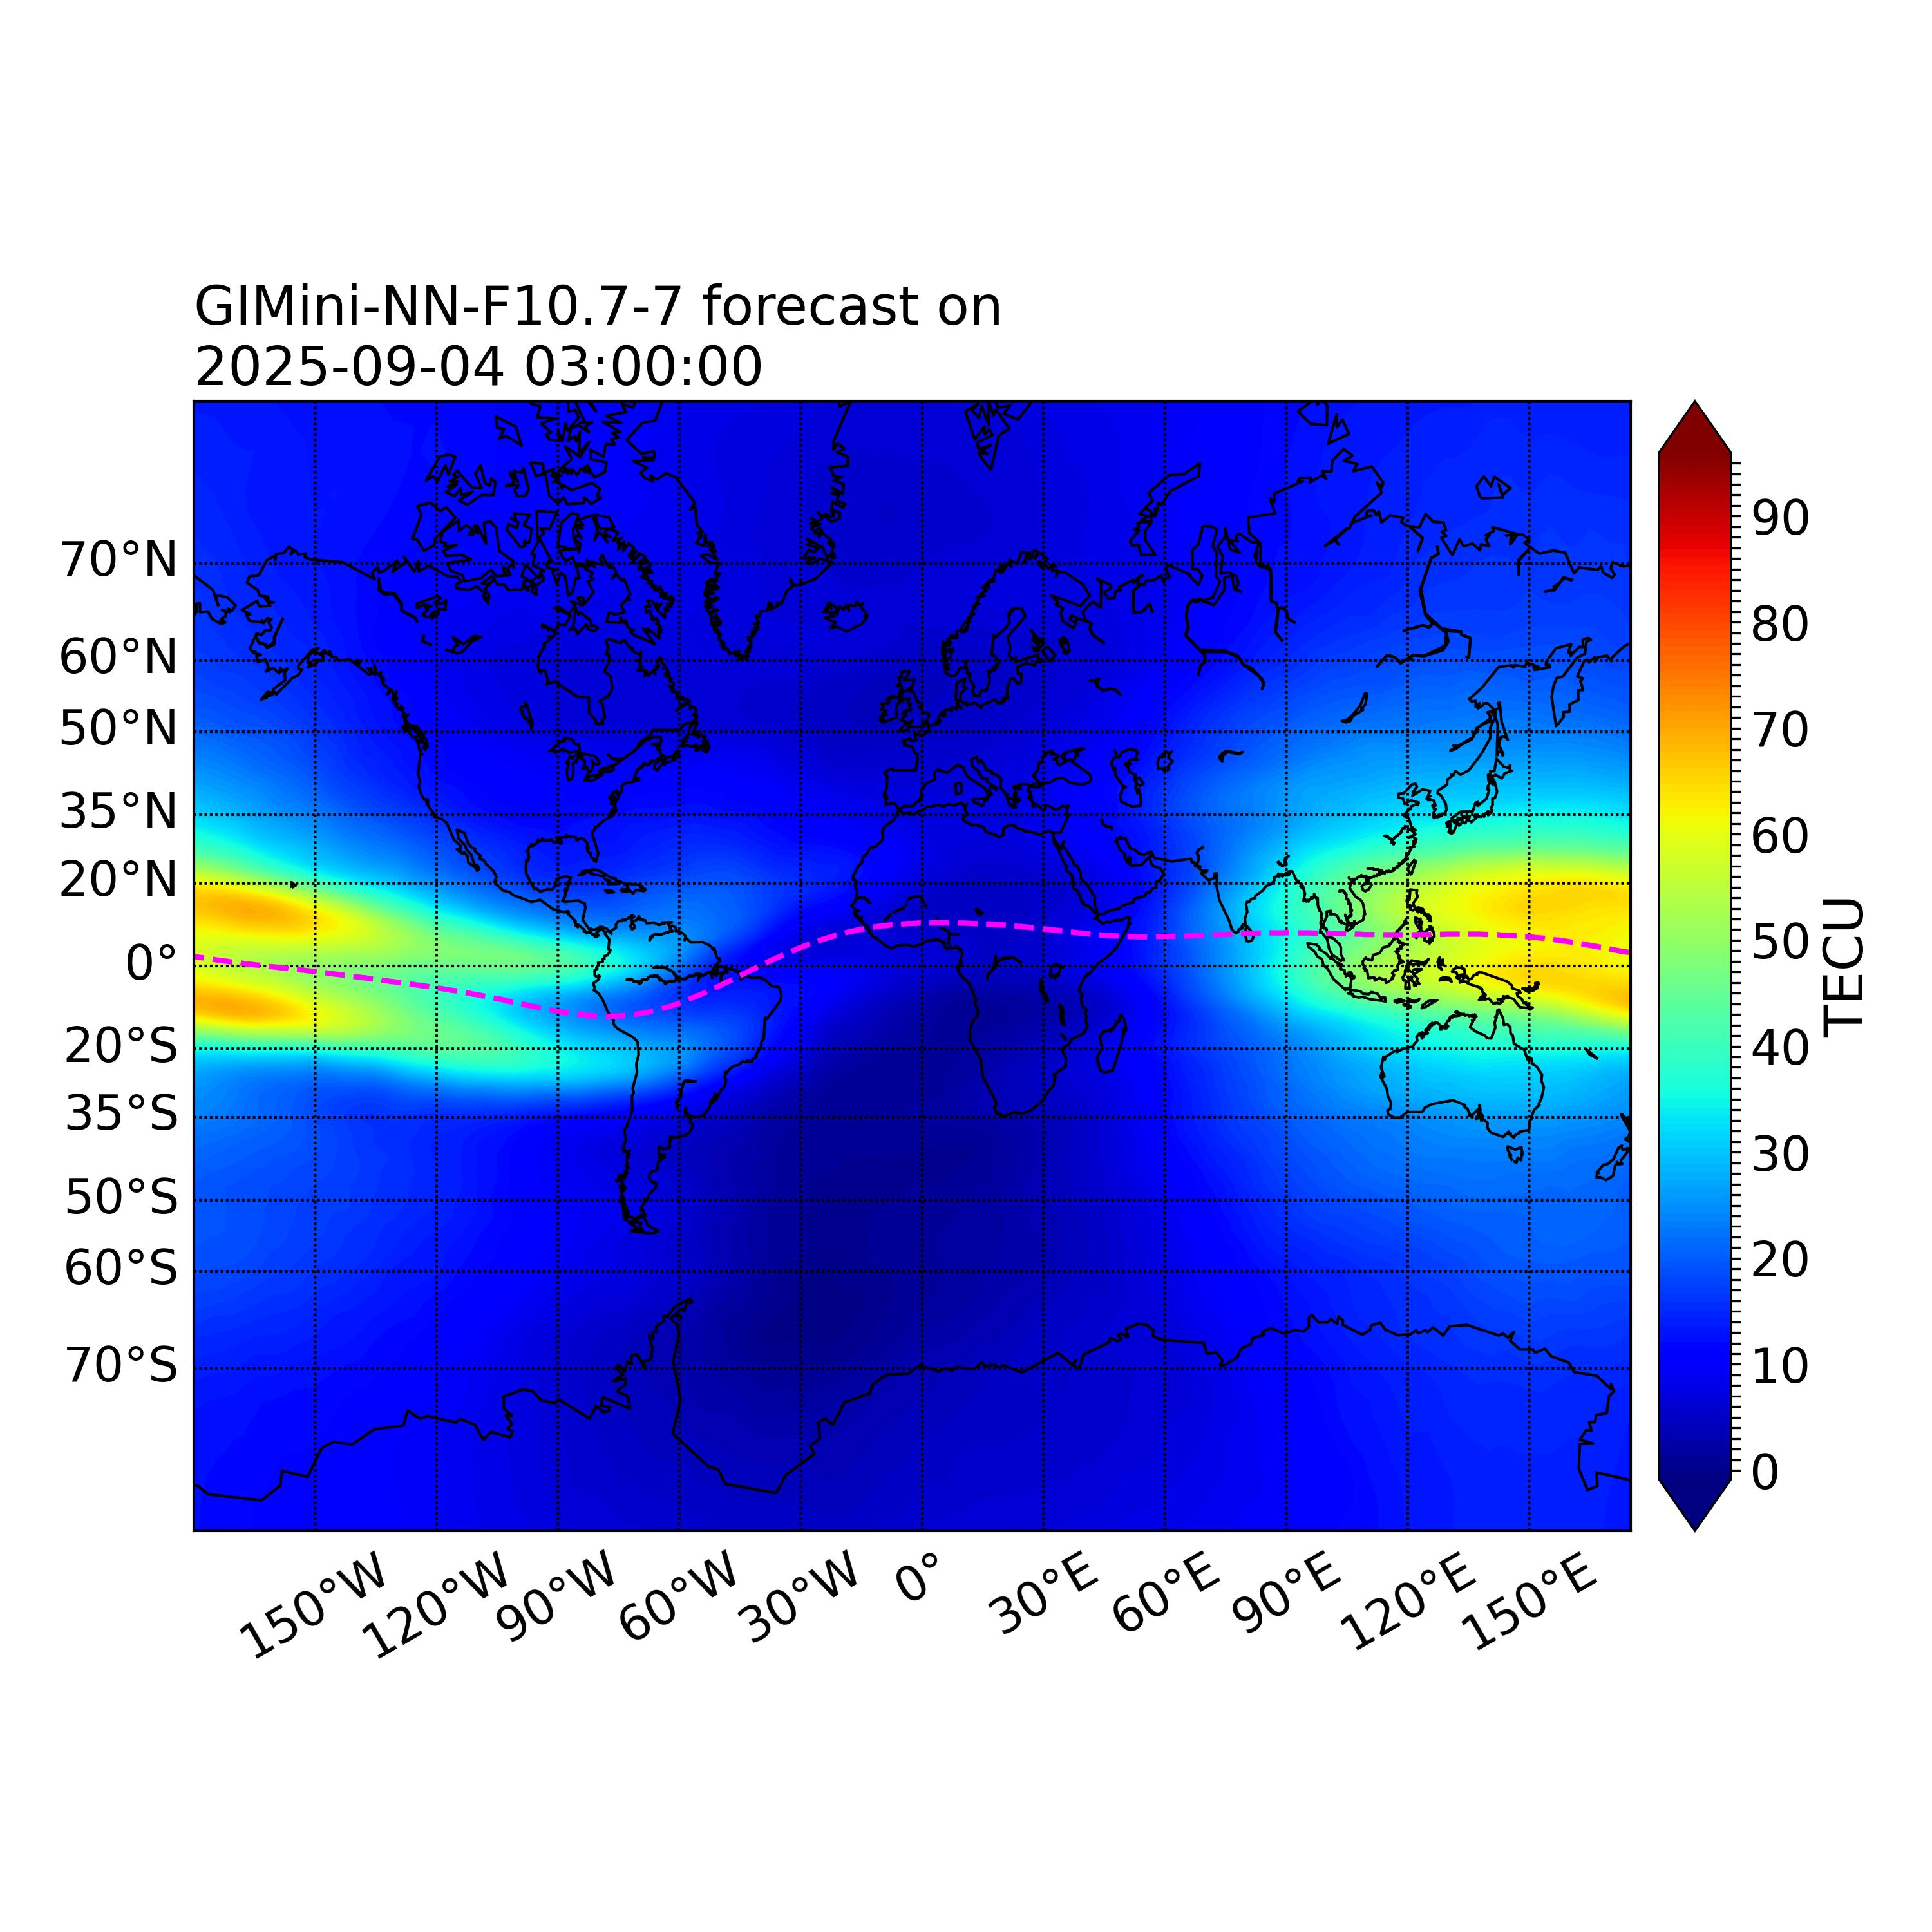

In [3]:
import requests

forecast = forecasts[0]
forecast_id = forecast["id"]
shift_in_hours_from_midnight = 3

URL_IMAGES = "https://services.simurg.space/gim-tec-forecast/get_forecast_image"

url = f"{URL_IMAGES}/{forecast_id}?shift={shift_in_hours_from_midnight}"

resp = requests.get(url)

if resp.status_code != 200:
    raise ValueError(f"Could not get image for forecast {forecast} using {url}, code: {resp.status_code}")
else:
    with open("image.jpg", "wb") as f:
        f.write(resp.content)
        f.flush()
    from IPython.display import Image, display
    display(Image(filename="image.jpg"))

### Get data of GIM forecast 

Finally we can request data for map as `npz` files that store numpy arrays. Use URL (`forecast_id` needed, no need for `shift_in_hours_from_midnight` since `npz` file contains data for whole day):

```python
https://services.simurg.space/gim-tec-forecast/get_forecast_object/{forecast_id}
```

After which you will get binary response that you should save as image and then can display with code:

```python
with open("image.jpg", "wb") as f:
    f.write(resp.content)
    f.flush()
from IPython.display import Image, display
display(Image(filename="image.jpg")
```

In [3]:
import requests

forecast = forecasts[0]
forecast_id = forecast["id"]

URL_OBJECTS = "https://services.simurg.space/gim-tec-forecast/get_forecast_object"

url = f"{URL_OBJECTS}/{forecast_id}"

resp = requests.get(url)

if resp.status_code != 200:
    raise ValueError(f"Could not get image for forecast {forecast} using {url}, code: {resp.status_code}")
else:
    with open("maps.npz", "wb") as f:
        f.write(resp.content)
        f.flush()

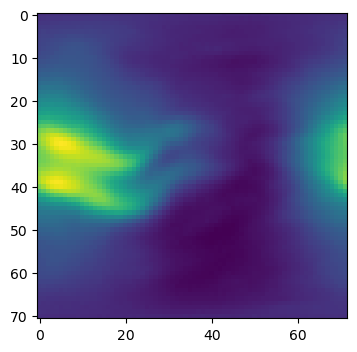

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,  1, figsize=(4, 4))
data = np.load('maps.npz', allow_pickle=True)
plt.figure
plt.imshow(data['forecast'][0])